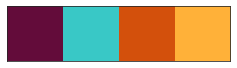

In [4]:
from typing import NamedTuple
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [5]:
songs = pd.read_csv(".\dataset\mySongsDataset.csv")

songs.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2889 non-null   object 
 1   artist        2889 non-null   object 
 2   id            2889 non-null   object 
 3   danceability  2889 non-null   float64
 4   energy        2889 non-null   float64
 5   loudness      2889 non-null   float64
 6   speechiness   2889 non-null   float64
 7   acousticness  2889 non-null   float64
 8   tempo         2889 non-null   float64
 9   liveness      2889 non-null   float64
 10  valence       2889 non-null   float64
dtypes: float64(8), object(3)
memory usage: 248.4+ KB


In [6]:
songs.head()

,name,artist,id,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.603,-4.892,0.2260,0.02720,123.061,0.1670,0.497
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.390,-11.033,0.0524,0.83700,87.512,0.1010,0.530
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.692,-6.643,0.0262,0.47800,104.095,0.0446,0.965
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.849,-5.216,0.0833,0.00014,94.964,0.4230,0.503
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.916,-4.698,0.0644,0.00285,186.941,0.2630,0.338


In [7]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

In [8]:
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lost,Frank Ocean,4L7jMAP8UcIe309yQmkdcO,0.913,0.913635,0.2260,0.02720,0.1670
1,O Navio Dela,Manel Cruz,4iTCY29czaXBLj9luDoDDU,0.579,0.750193,0.0524,0.83700,0.1010
2,Quinta-feira,Doismileoito,78KOwEZXibZSrEtRzByt3X,0.768,0.867032,0.0262,0.47800,0.0446
3,sanjake,cleopatrick,3oBbNQot23WQVDg6aUak04,0.397,0.905012,0.0833,0.00014,0.4230
4,Feelings,The Offspring,50UeatbSCQaOInjokdo7WQ,0.204,0.918798,0.0644,0.00285,0.2630


array([[<AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'liveness'}>, <AxesSubplot:>]],
      dtype=object)

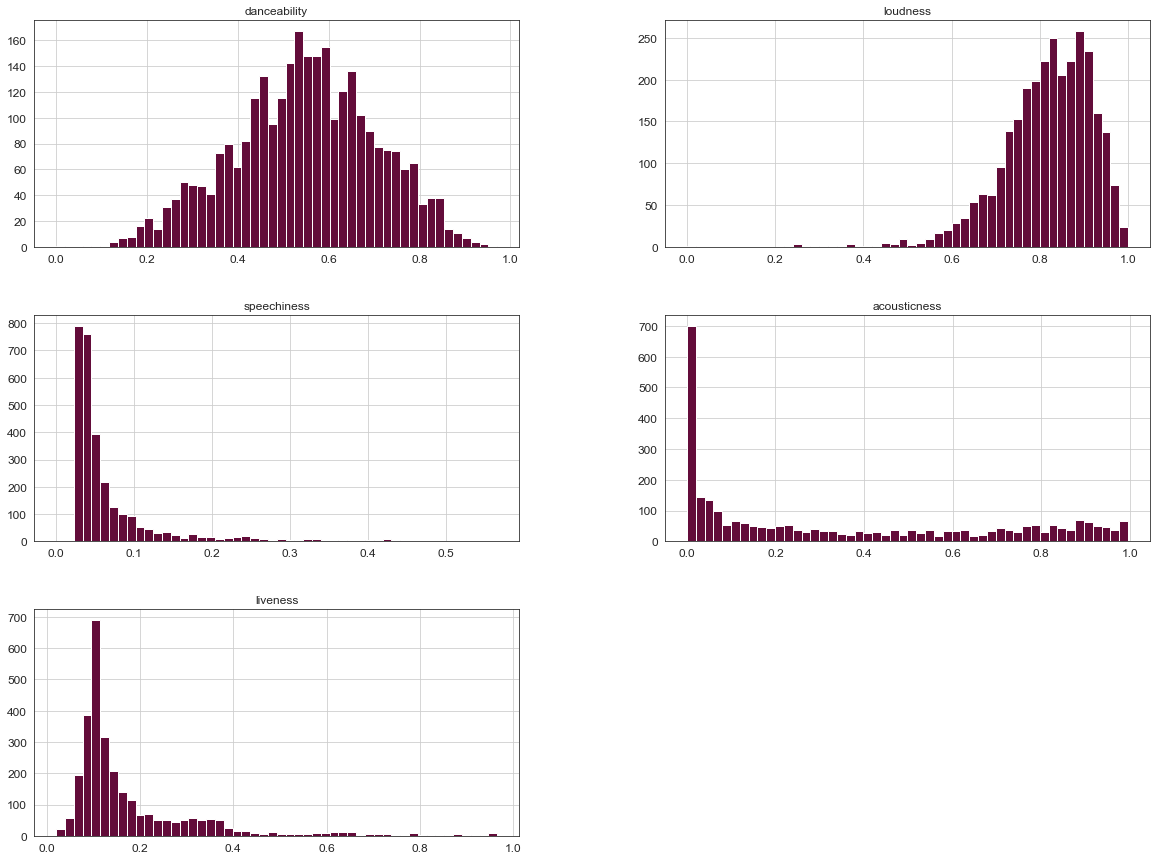

In [9]:
songs.hist(bins=50,figsize=(20,15))

In [10]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [12]:
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5076157656291582)
For n_clusters = 3, silhouette score is 0.3441081562916239)
For n_clusters = 4, silhouette score is 0.3515592680935808)
For n_clusters = 5, silhouette score is 0.27522756133551163)
For n_clusters = 6, silhouette score is 0.26109266344645127)
For n_clusters = 7, silhouette score is 0.26043010397834165)
For n_clusters = 8, silhouette score is 0.2544461522156524)
For n_clusters = 9, silhouette score is 0.2564684409195008)
For n_clusters = 10, silhouette score is 0.24864364297299243)
For n_clusters = 11, silhouette score is 0.24024856007738385)
For n_clusters = 12, silhouette score is 0.23416866528234817)
For n_clusters = 13, silhouette score is 0.22989007450600657)
For n_clusters = 14, silhouette score is 0.23572559497376053)


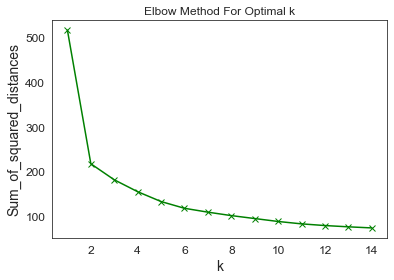

In [13]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(n_clusters=4)

In [15]:
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

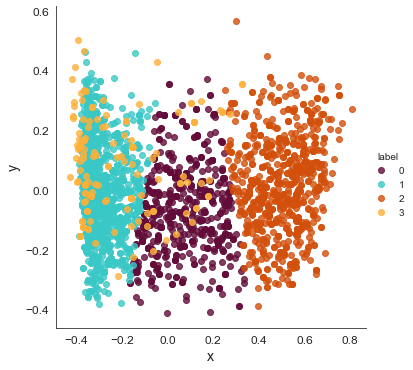

In [16]:

pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [17]:
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

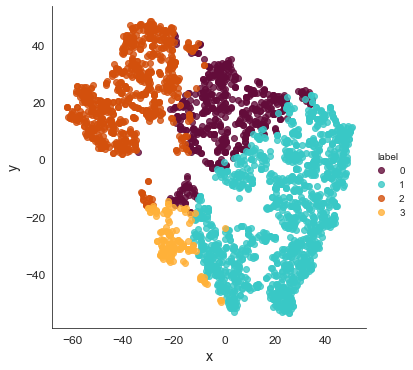

In [18]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [19]:
pca.explained_variance_ratio_

array([0.69392072, 0.1385622 ])

In [20]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.042347 -0.198992    -0.023744       0.97634 -0.069326
PC-2     -0.968245 -0.011416    -0.054485      -0.02846  0.242060


In [21]:
songs['label'] = y_kmeans

In [22]:
songs = songs.sample(frac=1)
songs['label'].value_counts()

1    1368
2     784
0     590
3     147
Name: label, dtype: int64

In [23]:
songs[songs['label'] == 0].tail(50) #Sad

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
1204,How To Disappear Completely,Radiohead,69pwmeyvQMuHMtkCmpEWhQ,0.168,0.733905,0.0344,0.315,0.1100,0
139,Утро,Дайте танк (!),0aKl63MnUIVKkXlVtp2vLr,0.549,0.815240,0.1130,0.488,0.1340,0
217,Pink Moon,Tash Sultana,1FGrw8CHZlMcMWzck3oCng,0.280,0.794853,0.0308,0.539,0.1800,0
653,Super Rich Kids,Frank Ocean,0K9oqDmJBgSFjXU1bUY9Fk,0.739,0.824502,0.0854,0.219,0.1960,0
807,CAN'T GET OVER YOU (feat. Clams Casino),Joji,39oeKRgsLeynDIbWuXyA47,0.900,0.809704,0.3320,0.684,0.0853,0
47,Oi,Lagum,78kar2tZk7655xZMibzXO3,0.807,0.794826,0.0459,0.296,0.1010,0
1963,Yoko,Terno Rei,7sdSvGV4jqP4uqFSLxzfKj,0.656,0.814521,0.0278,0.247,0.1620,0
749,Gemini,Tash Sultana,1HGpbxOa0ajt5WCVHxgxWV,0.249,0.819684,0.0281,0.460,0.1140,0
525,Thinkin Bout You,Frank Ocean,5mphdlILgAq3vh1MSvAJTS,0.721,0.745881,0.0532,0.409,0.0973,0
1158,Tokyo,Thundercat,0Att3l6OhP6j87mEjxA758,0.364,0.735688,0.1080,0.461,0.2200,0


In [24]:
songs[songs['label'] == 1].head(50) #Energetic

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2279,R.I.P. 2 My Youth,The Neighbourhood,07VBqWH6NG8L2ad3l84UKk,0.353,0.892024,0.0534,0.002160,0.1230,1
2758,Pain,Three Days Grace,33daQo3S8j2NcJstEHXwhQ,0.416,0.937349,0.0335,0.008040,0.2730,1
915,I Miss You,Björk,5L18d6jJ94EYTu1FG1peY0,0.636,0.760174,0.0385,0.023700,0.0201,1
2650,Zero Visibility,Rise Against,4JnWKLgb2iCU7XdmKLQr2e,0.213,0.942246,0.1250,0.000608,0.1750,1
2734,Withered Delilah,Slash,6kFGyNArFrH2g6RVUH4r9W,0.551,0.970617,0.0639,0.000340,0.3380,1
535,Some Girls Are Bigger Than Others - 2011 Remaster,The Smiths,3znapZvsInnCVsDERDUaM5,0.525,0.789370,0.0547,0.002500,0.2160,1
663,Sweet Life,Frank Ocean,6fbjdXZNtoAJbJZUeT87Ii,0.479,0.882176,0.1790,0.227000,0.0808,1
705,Big Climb,Everything Everything,2rf8fytHWvGwm0Lc7FnY36,0.656,0.822559,0.0684,0.009660,0.0681,1
717,Photoshop Handsome,Everything Everything,6PSqpcP7qP3ugM9D44LzUA,0.649,0.894099,0.0482,0.014100,0.0894,1
303,The Pretender,Foo Fighters,7x8dCjCr0x6x2lXKujYD34,0.433,0.936311,0.0431,0.000917,0.0280,1


In [25]:
songs[songs['label'] == 2].tail(50) #Calm

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
872,Moon,Foals,2dsv4VZ2o2B0afYF9Xcbma,0.185,0.661193,0.0343,0.799,0.1880,2
1334,Presságio,Salvador Sobral,6Y96Q5etuae2dFKurczT5j,0.441,0.651239,0.0641,0.883,0.1310,2
1024,'City College',Marion McPherson,0pS1ehq4tkva7YcyXljpye,0.000,0.556437,0.0000,0.586,0.3300,2
1778,The Drowned Girl,Yann Tiersen,4Stznl3BCCggfDmqnoIv6y,0.525,0.793575,0.0442,0.828,0.0712,2
1517,Quem Me Dera,Valter Lobo,4m1KsLnr0vI8nntJnsrXTI,0.414,0.724935,0.0339,0.936,0.1080,2
2157,Motivo de Alarma,Diego Lorenzini,2tCEXRGZzNBFPyqYsR6NDx,0.629,0.687755,0.1100,0.948,0.1070,2
1294,"Ô, Ana",Mallu Magalhães,1ruUd8S25B8MIf5WWR2gid,0.664,0.682192,0.0351,0.897,0.0961,2
2075,Flume,Bon Iver,12DA0XIh6NqwthSOQ4d9af,0.456,0.591994,0.0337,0.921,0.1100,2
2156,Soy un Corpóreo y Dentro de Mí Hay una Actriz ...,Diego Lorenzini,1ZwHeQmpc5h9MTgWN9paAF,0.545,0.762675,0.0408,0.931,0.0982,2
1715,Lucky Sue,Men I Trust,4lAfXpZKFDEudiEzLB9uHm,0.818,0.636521,0.0733,0.832,0.0892,2


In [26]:
songs[songs['label'] == 3].tail(50) #Sad

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
2399,Andromeda (feat. DRAM),Gorillaz,2C0KFbb4v9CNWR5c9jWcKC,0.788,0.803742,0.0475,0.003000,0.590,3
2578,Carry on Wayward Son,Kansas,4DMKwE2E2iYDKY01C335Uw,0.482,0.891198,0.0320,0.003210,0.446,3
145,Amour T'es La,Snarky Puppy,4MIXgItmCtVLCnT4BvU5tU,0.511,0.741783,0.1830,0.211000,0.733,3
665,Pyramids,Frank Ocean,0rbK15g3UsDTVy1EuwgKYz,0.400,0.881378,0.0466,0.011800,0.791,3
1626,When Doves Cry,Prince,51H2y6YrNNXcy3dfc3qSbA,0.729,0.921060,0.0490,0.010200,0.443,3
560,Secrets,The Weeknd,00NAQYOP4AmWR549nnYJZu,0.664,0.890027,0.0533,0.015500,0.460,3
802,Overseas,Thundercat,1iGOI54dl6Ps1kYlSpPZzg,0.849,0.818567,0.0338,0.440000,0.780,3
2436,Undefeated,Skillet,7sCQbcrVlIKoIjOpR3Oj5N,0.684,0.993453,0.0748,0.001340,0.878,3
2831,Wastelands,Linkin Park,3S8MFB68isPbRVgaU0MaIW,0.440,0.951188,0.1840,0.010400,0.964,3
2331,wish you were gay,Billie Eilish,3Fj47GNK2kUF0uaEDgXLaD,0.853,0.772416,0.2410,0.390000,0.752,3


In [27]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels


X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)
cross_val_score(rfc,X,y,cv=5)

array([0.98788927, 0.98442907, 0.98442907, 0.98788927, 0.98786828])

In [28]:
y_pred = rfc.predict(X_test)

In [29]:
X_train

,danceability,loudness,speechiness,acousticness,liveness
923,0.518,0.667660,0.0349,0.015700,0.0790
2085,0.518,0.947143,0.0429,0.190000,0.1220
2183,0.592,0.717749,0.0431,0.959000,0.1590
773,0.759,0.768690,0.1200,0.736000,0.1070
1587,0.423,0.832247,0.0380,0.519000,0.0911
...,...,...,...,...,...
2141,0.667,0.807335,0.0304,0.399000,0.1050
2306,0.830,0.895803,0.0494,0.050900,0.3310
2888,0.386,0.943736,0.0405,0.000010,0.0811
1738,0.335,0.512442,0.0318,0.974000,0.0998


In [30]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[185   5   1   0]
 [  1 467   0   0]
 [  2   0 247   0]
 [  1   2   0  43]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

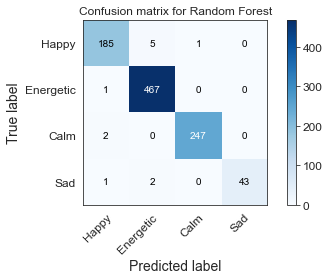

In [31]:
#definitions=['Energetic','Depressed','Sad','Calm','Happy','Contentment','Frantic','Exuberant']
definitions=["Sad",'Happy','Calm','Energetic']
plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [32]:
import pickle

with open('MOODAI.pickle','wb') as fe_data_file:
     pickle.dump(rfc, fe_data_file)

In [33]:
#Code Example
#Import the module
#import pickle
#Load the data - No need to do Feature Engineering again
#with open('fe_data.pickle','rb') as fe_data_file:
#     feature_engineered_data = pickle.load(fe_data_file)
#Continue with your modeling


In [36]:
songs[songs["artist"]=="Pharrell Williams"]

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
411,Marilyn Monroe,Pharrell Williams,5KmJMi7MiBJtCeJ08lmKzo,0.881,0.817156,0.0641,0.0578,0.3030,1
403,Frontin' (feat. Jay-Z) - Club Mix,Pharrell Williams,0iFOG4Ki9aDmJUYUFHQlPG,0.894,0.886461,0.1300,0.4530,0.0801,0
2556,"Happy - From ""Despicable Me 2""",Pharrell Williams,60nZcImufyMA1MKQY3dcCH,0.647,0.919756,0.1830,0.2190,0.0908,1


NameError: name 'songs' is not defined

0.24.1
